'''

The Car Evaluation dataset is a benchmark dataset commonly used in machine learning research for evaluating classification algorithms. It contains attributes of various cars, including buying price, maintenance cost, number of doors, capacity, and safety. Each car is classified into one of four categories: unacceptable, acceptable, good, or very good. With a total of 1,728 instances, this dataset offers a diverse range of features and target classes, making it suitable for training and testing classification models. Researchers often employ it to assess the performance of algorithms in accurately predicting the acceptability of cars based on their attributes.

'''

### Importing Libraries

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Reading the csv file

In [42]:
df=pd.read_csv('/kaggle/input/car-evaluation-data-set/car_evaluation.csv')
df

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [44]:
df.columns

Index(['vhigh', 'vhigh.1', '2', '2.1', 'small', 'low', 'unacc'], dtype='object')

In [45]:
#finding the missing values in each column
df.isnull().sum()

vhigh      0
vhigh.1    0
2          0
2.1        0
small      0
low        0
unacc      0
dtype: int64

In [46]:
#Number of rows and columns in a dataset
df.shape

(1727, 7)

In [47]:
df.columns=['buying','maint','doors','persons','lug_boot','safety','class']
df.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'], dtype='object')

In [48]:
# summary the number of entries, the data types of each column.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1727 non-null   object
 1   maint     1727 non-null   object
 2   doors     1727 non-null   object
 3   persons   1727 non-null   object
 4   lug_boot  1727 non-null   object
 5   safety    1727 non-null   object
 6   class     1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [49]:
#Calculating the count of unique categories in each column
for col in df.columns:
    print(df[col].value_counts())

buying
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64
maint
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64
doors
3        432
4        432
5more    432
2        431
Name: count, dtype: int64
persons
4       576
more    576
2       575
Name: count, dtype: int64
lug_boot
med      576
big      576
small    575
Name: count, dtype: int64
safety
med     576
high    576
low     575
Name: count, dtype: int64
class
unacc    1209
acc       384
good       69
vgood      65
Name: count, dtype: int64


In [51]:
#Seprating the features and target variable
X=df.drop(['class'],axis=1)
y=df['class']

'''
the stratify parameter preserves the class distribution in both the training and testing sets, which is crucial for imbalanced datasets.
'''

In [52]:
# Partitioning the dataset into training and testing dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0,stratify=y)
X_train.shape,y_train.shape,X_test.shape

((1208, 6), (1208,), (519, 6))

In [53]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
590,high,high,3,more,big,low
1542,low,med,3,2,med,med
748,high,med,5more,more,small,high
1228,med,low,3,4,med,high
814,high,low,4,2,med,high


### Data Preprocessing

In [54]:
#The OrdinalEncoder is used to transform categorical features into ordinal integers.
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
X_train=oe.fit_transform(X_train)
X_test=oe.transform(X_test)

In [55]:
X.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'], dtype='object')

In [56]:
#Using a Decision Tree Classifier with the Gini impurity criterion and a maximum depth of 3 to fit the training data
from sklearn.tree import DecisionTreeClassifier

Dtcf_gini=DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=0)
Dtcf_gini.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [57]:
##Predicting the target variable using Decision Tree Classifier trained model on test dataset
y_pred_gini=Dtcf_gini.predict(X_test)
y_pred_gini

array(['unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'acc',
       'unacc', 'acc', 'unacc', 'acc', 'unacc', 'acc', 'unacc', 'unacc',
       'unacc', 'acc', 'unacc', 'acc', 'acc', 'unacc', 'acc', 'acc',
       'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc',
       'unacc', 'acc', 'acc', 'unacc', 'acc', 'acc', 'unacc', 'acc',
       'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'acc', 'unacc',
       'acc', 'acc', 'acc', 'acc', 'unacc', 'unacc', 'unacc', 'acc',
       'acc', 'acc', 'acc', 'acc', 'unacc', 'unacc', 'unacc', 'acc',
       'acc', 'acc', 'unacc', 'unacc', 'acc', 'unacc', 'acc', 'unacc',
       'acc', 'acc', 'unacc', 'acc', 'acc', 'unacc', 'unacc', 'unacc',
       'unacc', 'unacc', 'unacc', 'acc', 'acc', 'acc', 'acc', 'acc',
       'unacc', 'acc', 'acc', 'acc', 'acc', 'unacc', 'unacc', 'acc',
       'acc', 'unacc', 'unacc', 'unacc', 'acc', 'acc', 'unacc', 'unacc',
       'unacc', 'acc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc',


In [ ]:
y_test.shape

In [58]:
#Calculating the accuracy score
from sklearn.metrics import accuracy_score
print('Model accuracy score with criterion gini index:{:.4f}'.format(accuracy_score(y_test,y_pred_gini)))

Model accuracy score with criterion gini index:0.7881


[Text(0.375, 0.875, 'x[3] <= 0.5\ngini = 0.457\nsamples = 1208\nvalue = [269, 48, 846, 45]'),
 Text(0.25, 0.625, 'gini = 0.0\nsamples = 408\nvalue = [0, 0, 408, 0]'),
 Text(0.5, 0.625, 'x[5] <= 0.5\ngini = 0.58\nsamples = 800\nvalue = [269, 48, 438, 45]'),
 Text(0.25, 0.375, 'x[0] <= 2.5\ngini = 0.628\nsamples = 270\nvalue = [146, 21, 58, 45]'),
 Text(0.125, 0.125, 'gini = 0.611\nsamples = 201\nvalue = [113, 21, 22, 45]'),
 Text(0.375, 0.125, 'gini = 0.499\nsamples = 69\nvalue = [33, 0, 36, 0]'),
 Text(0.75, 0.375, 'x[5] <= 1.5\ngini = 0.429\nsamples = 530\nvalue = [123, 27, 380, 0]'),
 Text(0.625, 0.125, 'gini = 0.0\nsamples = 258\nvalue = [0, 0, 258, 0]'),
 Text(0.875, 0.125, 'gini = 0.584\nsamples = 272\nvalue = [123, 27, 122, 0]')]

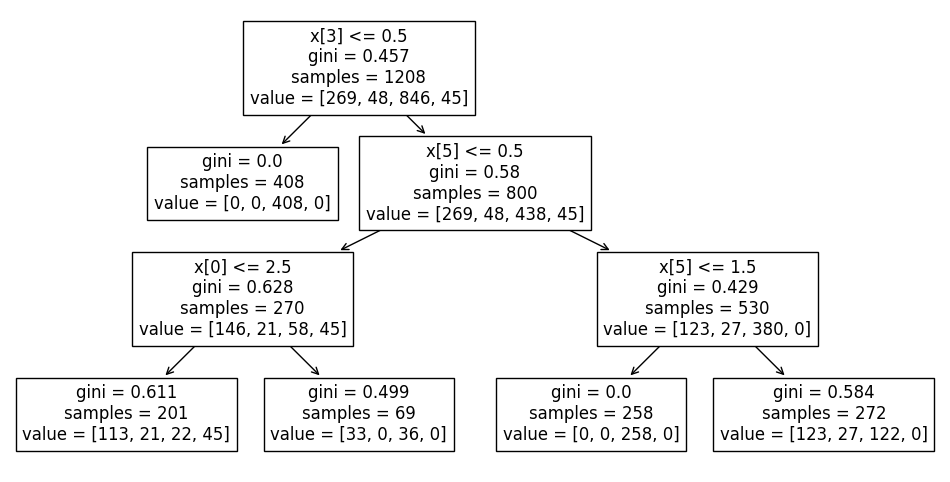

In [59]:
#Visualizing the decision tree trained using the Gini impurity criterion on the training data.

plt.rcParams['figure.figsize']=(12,6)
from sklearn import tree
tree.plot_tree(Dtcf_gini.fit(X_train,y_train))

In [60]:
X_train.shape

(1208, 6)

In [61]:
y_train.unique()

array(['unacc', 'acc', 'good', 'vgood'], dtype=object)

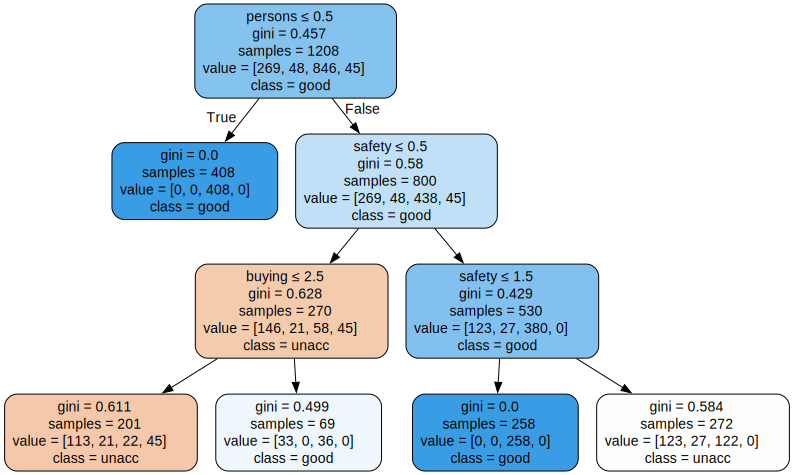

In [62]:
import graphviz
dot_data=tree.export_graphviz(Dtcf_gini,out_file=None,
                              feature_names=X.columns,
                              class_names=[str(class_label) for class_label in y_train.unique()],
                              filled=True, rounded=True,
                              special_characters=True)
graph=graphviz.Source(dot_data)
graph

In [63]:
#Using a Decision Tree Classifier with the entropy criterion and a maximum depth of 3 to fit the training data

Dtcf_en=DecisionTreeClassifier(criterion='entropy',max_depth=3,random_state=0)
Dtcf_en.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [64]:
#Predicting the target variable using Decision Tree Classifier trained model on test dataset

y_pred_en=Dtcf_en.predict(X_test)
y_pred_en.shape

(519,)

In [66]:
#Calculating the accuracy score
print('Model accuracy score with criterion entropy:{:.4f}'.format(accuracy_score(y_test,y_pred_en)))

Model accuracy score with criterion entropy:0.7881


[Text(0.375, 0.875, 'x[3] <= 0.5\nentropy = 1.204\nsamples = 1208\nvalue = [269, 48, 846, 45]'),
 Text(0.25, 0.625, 'entropy = 0.0\nsamples = 408\nvalue = [0, 0, 408, 0]'),
 Text(0.5, 0.625, 'x[5] <= 0.5\nentropy = 1.482\nsamples = 800\nvalue = [269, 48, 438, 45]'),
 Text(0.25, 0.375, 'x[0] <= 2.5\nentropy = 1.674\nsamples = 270\nvalue = [146, 21, 58, 45]'),
 Text(0.125, 0.125, 'entropy = 1.64\nsamples = 201\nvalue = [113, 21, 22, 45]'),
 Text(0.375, 0.125, 'entropy = 0.999\nsamples = 69\nvalue = [33, 0, 36, 0]'),
 Text(0.75, 0.375, 'x[5] <= 1.5\nentropy = 1.052\nsamples = 530\nvalue = [123, 27, 380, 0]'),
 Text(0.625, 0.125, 'entropy = 0.0\nsamples = 258\nvalue = [0, 0, 258, 0]'),
 Text(0.875, 0.125, 'entropy = 1.367\nsamples = 272\nvalue = [123, 27, 122, 0]')]

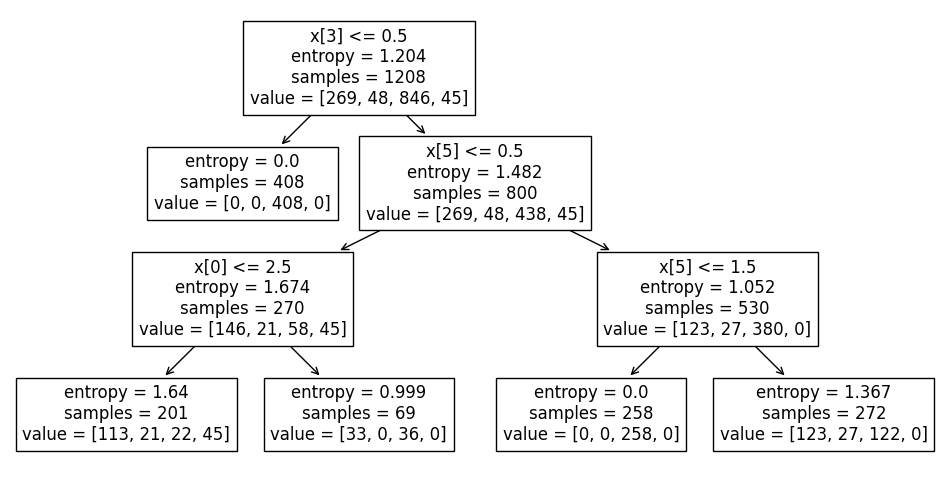

In [67]:
#Visualizing the decision tree trained using the entropy criterion on the training data.
tree.plot_tree(Dtcf_en.fit(X_train,y_train))

In [ ]:
import graphviz
dot_data=tree.export_graphviz(Dtcf_en,out_file=None,
                              feature_names=X.columns,
                              class_names=[str(class_label) for class_label in y_train.unique()],
                              filled=True,rounded=True,
                              special_characters=True)
graph=graphviz.Source(dot_data)
graph

In [68]:
#Metrics of classification algorithm
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred_en)
print('Confusion Matrix:\n:',cm)

Confusion Matrix:
: [[102   0  13   0]
 [ 21   0   0   0]
 [ 56   0 307   0]
 [ 20   0   0   0]]


In [69]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_en))

              precision    recall  f1-score   support

         acc       0.51      0.89      0.65       115
        good       0.00      0.00      0.00        21
       unacc       0.96      0.85      0.90       363
       vgood       0.00      0.00      0.00        20

    accuracy                           0.79       519
   macro avg       0.37      0.43      0.39       519
weighted avg       0.78      0.79      0.77       519



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
